# wikipedia article Linear least squares

https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Properties_of_the_least-squares_estimators

Overdetermined system:

$$
\sum_{j=1}^n X_{ij}\beta_j = y_i, (i=1,2,\dots,m)
$$

where:

- $n$ is number of parameters
- $m$ is number of data points
- $m > n$

In matrix form:

$$
\mathbf{X}\mathbf{\beta} = \mathbf{y}
$$

This has no solution, so we find the best solution by solving the quadratic minimization problem:

$$
\hat{\mathbf{\beta}} = \mathrm{argmin}_{\beta}S(\mathbf{\beta})
$$

where objective function $S$ is given by:

$$
S(\beta) = \sum_{i=1}^m \lvert y_i-\sum_{j=1}^nX_{ij}\beta_j \rvert^2 = ||\mathbf{y} - \mathbf{X}\mathbf{\beta}||^2
$$

Solution is unique, and is the solution of the normal equations:

$$
(\mathbf{X}^T\mathbf{X})\mathbf{\hat{\beta}} = \mathbf{X}^T \mathbf{y}
$$
&nbsp;

$$
S(\mathbf{\beta}) = ||\mathbf{y} - \mathbf{X}\mathbf{\beta}||^2
$$
&nbsp;

$$
=(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T(\mathbf{y} - \mathbf{X}\mathbf{\beta})
$$
&nbsp;

$$
=\mathbf{y}^T\mathbf{y} - 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{y} + \mathbf{\beta}^T\mathbf{X}^T\mathbf{X}\mathbf{\beta}
$$

Differentiate wrt $\mathbf{\beta}$, and set equal to 0:

$$
= -2\mathbf{X}^T\mathbf{y} + \mathbf{X}^T\mathbf{X}\mathbf{\beta} = 0
$$

#### Inverting the matrix of the normal equations

The algebraic solution of the normal equations can be written as

$$
\mathbf{\hat{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$
&nbsp;

$$
=\mathbf{X}^+\mathbf{y}
$$

.... where $\mathbf{X}^+$ is the Moore-Penrose pseudoinverse of $\mathbf{X}$.

Using Cholesky decomposition:

$$
\mathbf{R}^T\mathbf{R}\mathbf{\hat{\beta}} = \mathbf{X}^T\mathbf{y}
$$

First solve for $\mathbf{R}^\mathbf{\hat{\beta}}$

Then solve for $\mathbf{\beta}$

In [84]:
import numpy as np
import scipy.linalg
import math
import time


def run(N=10, K=5, rand_scale=1/1000, rand_translate=1.7):
    # N = 10
    # K = 5

    nr = np.random.mtrand.RandomState(123)
#     X = nr.randn(N, K).astype(np.float32) / 1000 + 10.0
#     X = nr.randn(N, K).astype(np.float32) / 1000 + 1.7
    X = nr.randn(N, K).astype(np.float32) * rand_scale + rand_translate
    # y = nr.choice(2, N).reshape(N, 1)
    y = nr.randn(N, 1)
    print('')
    print('y.shape', y.shape)
    # print('X', X)
    # print('y', y)

    # method 1: use inverse
    # beta = XTy \ XTX
    start = time.time()
    beta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    t = time.time() - start
    # print('beta', beta)
    r = y - X.dot(beta).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, via inverse', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    beta_zeros = np.zeros(X[0].shape)
    t = time.time() - start
    # print('beta_zeros', beta_zeros)
    # print('X.dot beta_zeros', X.dot(beta_zeros).reshape(N, 1))
    r = y - X.dot(beta_zeros).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, all zeros', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    Q, R = np.linalg.qr(X)
    # print('Q', Q)
    # print('R', R)
    Rbeta = R.dot(beta)
    # print('Rbeta', Rbeta)
    Qty = Q.T.dot(y)
    # print('Qty', Qty)
    QtyK = Qty[:K]
    # print('QtyK', QtyK)
    # print('RBhat - QTyn', )
    beta_qr = scipy.linalg.solve_triangular(R, QtyK)
    t = time.time() - start
    r = y - X.dot(beta_qr).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, via QR', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    XTX = X.T.dot(X)
    R = scipy.linalg.cholesky(XTX)
    XTy = X.T.dot(y)
    Rbeta = scipy.linalg.solve_triangular(R.T, XTy, lower=True)
    beta_chol = scipy.linalg.solve_triangular(R, Rbeta)
    t = time.time() - start
    r = y - X.dot(beta_chol).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, via cholesky', np.linalg.norm(r, ord=2), 'time %s' % t)

run(rand_scale=1/1000, rand_translate=1.7)
run(N=1000, K=5, rand_scale=1/1000, rand_translate=1.1)
run(N=1000, K=100, rand_scale=1/100, rand_translate=4.8)
run(N=10000, K=1000, rand_scale=1/10, rand_translate=20)



y.shape (10, 1)
sum residuals square, via inverse 3.17161684324 time 0.00020647048950195312
sum residuals square, all zeros 3.85084762269 time 7.3909759521484375e-06
sum residuals square, via QR 3.10045496633 time 0.0003497600555419922
sum residuals square, via cholesky 3.18789241 time 0.0002636909484863281

y.shape (1000, 1)
sum residuals square, via inverse 30.9960888594 time 0.00014829635620117188
sum residuals square, all zeros 30.9051117684 time 5.7220458984375e-06
sum residuals square, via QR 30.6978836503 time 0.0003883838653564453
sum residuals square, via cholesky 31.0702556666 time 0.0003142356872558594

y.shape (1000, 1)
sum residuals square, via inverse 29.8970772323 time 0.04769611358642578
sum residuals square, all zeros 30.8344006822 time 7.62939453125e-06
sum residuals square, via QR 29.2200476668 time 0.011691093444824219
sum residuals square, via cholesky 31.8596236803 time 0.0025277137756347656

y.shape (10000, 1)
sum residuals square, via inverse 94.7944365946 time

#### Orthogonal decomposition methods

Write out the residuals:

$$
\mathbf{r} = \mathbf{y} - \mathbf{X}\mathbf{\hat{\beta}}
$$

#### Gramian matrix

A set of vectors is linearly independent if and only if the Gram determinant is non-zero.

The Gram determinant is the square of the volume of the parallelotope formed by the vectors.

#### QR Decomposition

Any real square matrix $\mathbf{A}$ may be decomposed as:
$$
\mathbf{A} = \mathbf{Q} \mathbf{R}
$$

... where:

- $\mathbf{Q}$ is an orthogonal matrix
- $\mathbf{R}$ is an upper-triangular matrix

The factorization is unique if we require that the elements of $\mathbf{R}$ be positive

More generally, for rectangular $\mathbf{A}$:

$$
\mathbf{A} = \mathbf{Q}\mathbf{R}
$$
&nbsp;

$$
= \mathbf{Q}
\begin{bmatrix}
\mathbf{R}_1
\mathbf{0}
\end{bmatrix}
$$
&nbsp;

$$
=
\begin{bmatrix}
\mathbf{Q}_1 &
\mathbf{Q}_2
\end{bmatrix}
\begin{bmatrix}
\mathbf{R}_1 \\
\mathbf{0}
\end{bmatrix}
$$
&nbsp;

$$
=\mathbf{Q}_1 \mathbf{R}_1
$$


Q represents rotations, and/or reflection.  No stretching/shearing/scaling etc.

The first $k$ columns of $mathbf{Q}$ form an orthonormal basis for the span of the first $k$ columns of $\mathbf{A}$.  Any column $k$ of $\mathbf{A}$ depends only on the first $k$ columns of $\mathbf{Q}$, hence the triangular form of $\mathbf{R}$.

Since $\mathbf{Q}$ is orthornormal, so this means that $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$.

__Computation of QR decomposition__

QR decomposition can be calculated by:

- Gram-Schmidt process: relatively simple.  Quick. Numerically unstable
- Householder reflections: slower.  numerically more stable


In [8]:

import numpy as np
import math

A = np.random.randn(3, 4)
print('A\n', A)

Q, R = np.linalg.qr(A)
print('Q\n', Q)
print('R\n', R)

B = np.random.randn(4, 3)
print('B\n', B)
Q2, R2 = np.linalg.qr(B, 'complete')
print('Q2\n', Q2)
print('R2\n', R2)

print(Q2.dot(R2))

A
 [[ 0.19252491 -0.58918825 -1.12853587  0.19625544]
 [-0.25608579 -0.91844845 -0.14252624  0.10440866]
 [ 0.3163721  -0.96987222  0.98050448  0.4696464 ]]
Q
 [[ -4.27582914e-01  -2.95132745e-01  -8.54441054e-01]
 [  5.68746692e-01  -8.22512577e-01  -5.10244123e-04]
 [ -7.02637924e-01  -4.86178695e-01   5.19548097e-01]]
R
 [[-0.45026334  0.41103131 -0.2874583  -0.35452477]
 [ 0.          1.40085536 -0.02640288 -0.37213092]
 [ 0.          0.          1.47375934  0.07626192]]
B
 [[-0.04270745 -0.07089859 -1.01289314]
 [-1.08040694  0.55107845 -0.42492159]
 [-0.6020624   0.77245886  0.43848322]
 [ 0.41682415  0.8030246  -0.99418363]]
Q2
 [[-0.03270394  0.07979465  0.75859003  0.64583623]
 [-0.82733965 -0.08356808  0.34424431 -0.43591436]
 [-0.46103934 -0.46381306 -0.47344425  0.59005993]
 [ 0.31919005 -0.87836589  0.28616003 -0.21143205]]
R2
 [[ 1.30588077 -0.55342684 -0.13481146]
 [ 0.         -1.11533583  0.62456918]
 [ 0.          0.         -1.40674045]
 [ 0.          0.          0. 

y [-0.16054554  0.05653571  0.04200229 -0.32529482 -0.26025412]


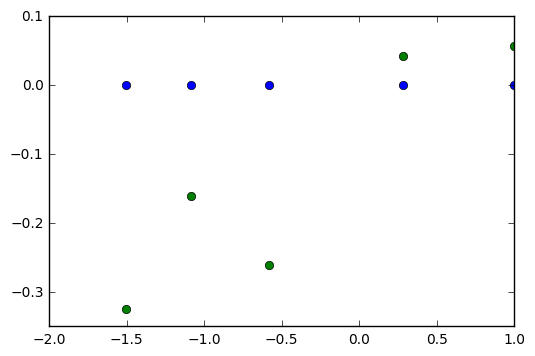

X
 [[-1.08563066]
 [ 0.99734545]
 [ 0.2829785 ]
 [-1.50629473]
 [-0.57860023]]
y
 [-0.16054554  0.05653571  0.04200229 -0.32529482 -0.26025412]


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 1

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

# xv = np.array([30, 90])
np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise
print('y', y)

# plot_vector(zerov, xv, 'r-x', label='x')
# plt.legend()
# plt.show()
plt.plot(X.reshape(N), np.zeros(N), 'o')
plt.plot(X.reshape(N), y, 'o')
plt.show()

print('X\n', X)
print('y\n', y)